In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
from arch import arch_model
from statsmodels.tsa.api import VAR

In [483]:
full_df = pd.read_excel('full_data.xlsx')
full_df

,Date,PBK,PP,PB
0,2015-01-01,1209.5,798.40,15.599
1,2015-01-02,1203.9,794.85,15.768
2,2015-01-05,1210.9,793.20,16.213
3,2015-01-06,1221.4,800.40,16.637
4,2015-01-07,1220.9,792.45,16.544
...,...,...,...,...
2019,2022-12-23,1032.6,1732.00,23.920
2020,2022-12-27,1032.7,1826.30,24.217
2021,2022-12-28,1020.2,1785.00,23.840
2022,2022-12-29,1065.0,1816.40,24.250


In [484]:
PBK_df = full_df.drop(axis=1, columns=['PP', 'PB'])
PBK_df

,Date,PBK
0,2015-01-01,1209.5
1,2015-01-02,1203.9
2,2015-01-05,1210.9
3,2015-01-06,1221.4
4,2015-01-07,1220.9
...,...,...
2019,2022-12-23,1032.6
2020,2022-12-27,1032.7
2021,2022-12-28,1020.2
2022,2022-12-29,1065.0


In [485]:
PP_df = full_df.drop(axis=1, columns=['PBK', 'PB'])
PP_df

,Date,PP
0,2015-01-01,798.40
1,2015-01-02,794.85
2,2015-01-05,793.20
3,2015-01-06,800.40
4,2015-01-07,792.45
...,...,...
2019,2022-12-23,1732.00
2020,2022-12-27,1826.30
2021,2022-12-28,1785.00
2022,2022-12-29,1816.40


In [486]:
PB_df = full_df.drop(axis=1, columns=['PBK', 'PP'])
PB_df

,Date,PB
0,2015-01-01,15.599
1,2015-01-02,15.768
2,2015-01-05,16.213
3,2015-01-06,16.637
4,2015-01-07,16.544
...,...,...
2019,2022-12-23,23.920
2020,2022-12-27,24.217
2021,2022-12-28,23.840
2022,2022-12-29,24.250


## PBK

### 1. Data preparation

In [487]:
df_pbk = PBK_df.copy()
df_pbk = df_pbk.set_index('Date')
df_pbk.index = pd.to_datetime(df_pbk.index)
# df = df.to_numpy()
df_pbk

,PBK
Date,
2015-01-01,1209.5
2015-01-02,1203.9
2015-01-05,1210.9
2015-01-06,1221.4
2015-01-07,1220.9
...,...
2022-12-23,1032.6
2022-12-27,1032.7
2022-12-28,1020.2


In [488]:
df_data_pbk = PBK_df.copy()
df_data_pbk = df_data_pbk.to_numpy()
data_pbk = df_data_pbk[:, 1]
data_pbk = np.float32(data_pbk)
data_pbk

array([1209.5, 1203.9, 1210.9, ..., 1020.2, 1065. , 1082.9], dtype=float32)

In [489]:
r_pbk= np.diff(np.log(data_pbk), n=1, axis=0)

In [490]:
r_pbk

array([-0.00464058,  0.00579739,  0.00863409, ..., -0.01217794,
        0.04297638,  0.01666784], dtype=float32)

In [491]:
df_r_pbk_temp = PBK_df.copy()
df_r_pbk_temp.drop(axis=0, index=[0], inplace=True)
df_r_pbk_temp

,Date,PBK
1,2015-01-02,1203.9
2,2015-01-05,1210.9
3,2015-01-06,1221.4
4,2015-01-07,1220.9
5,2015-01-08,1223.0
...,...,...
2019,2022-12-23,1032.6
2020,2022-12-27,1032.7
2021,2022-12-28,1020.2
2022,2022-12-29,1065.0


In [492]:
df_r_pbk_temp['Return'] = r_pbk
df_r_pbk_temp.drop(axis=1, columns='PBK', inplace=True)
df_r_pbk_temp = df_r_pbk_temp.set_index('Date')
df_r_pbk_temp.index = pd.to_datetime(df_r_pbk_temp.index)
df_r_pbk_temp

,Return
Date,
2015-01-02,-0.004641
2015-01-05,0.005797
2015-01-06,0.008634
2015-01-07,-0.000410
2015-01-08,0.001719
...,...
2022-12-23,0.041625
2022-12-27,0.000097
2022-12-28,-0.012178


### 2. Visualize

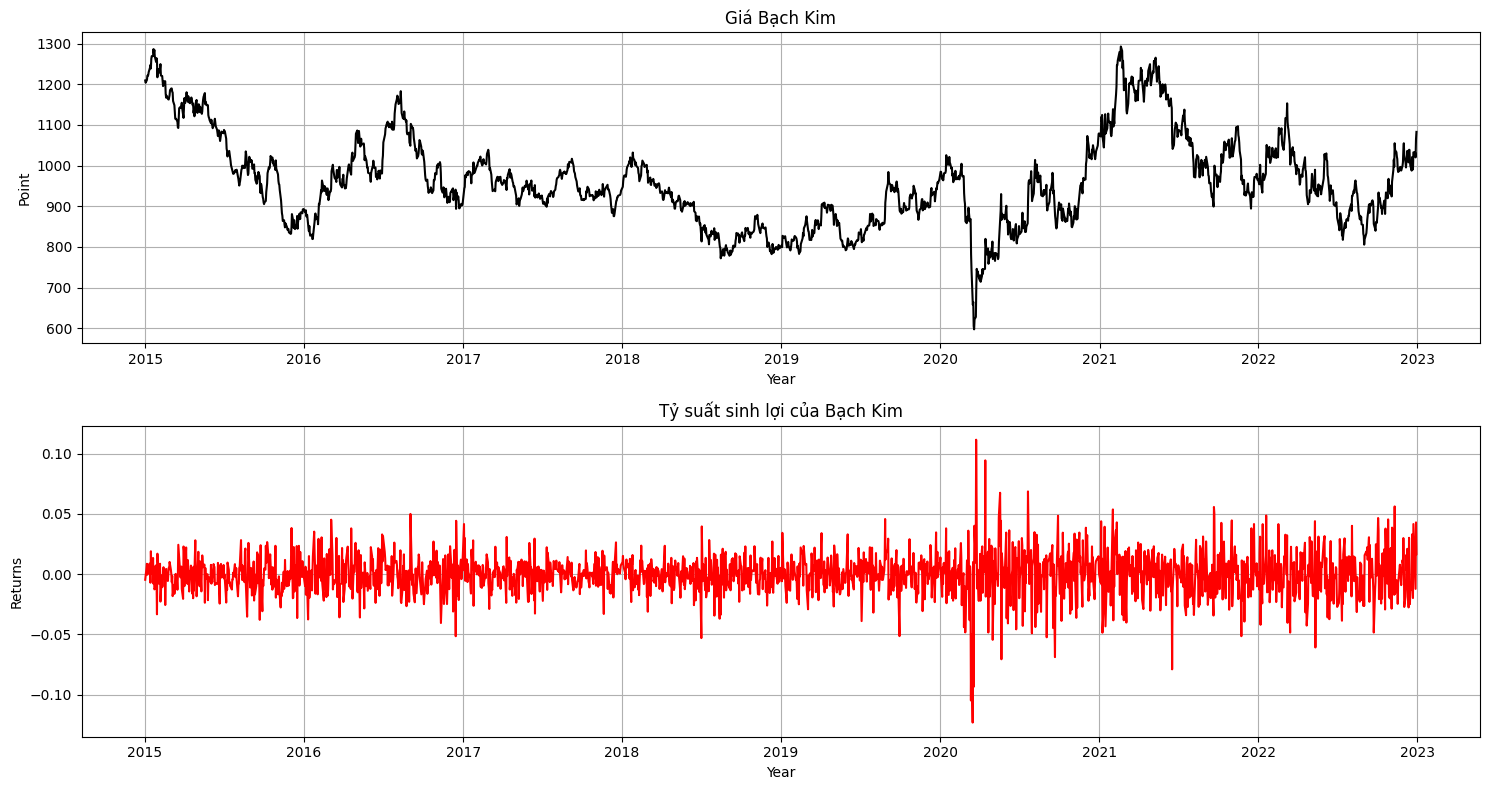

In [493]:
fig, ax= plt.subplots(2,1, figsize=(15,8))
ax[0].plot(df_pbk, color='black')
ax[0].title.set_text('Giá Bạch Kim')
ax[0].set(xlabel='Year', ylabel='Point')
ax[0].grid(True)
ax[1].plot(df_r_pbk_temp, color='red')
ax[1].title.set_text('Tỷ suất sinh lợi của Bạch Kim')
ax[1].set(xlabel='Year', ylabel='Returns')
ax[1].grid(True)
plt.tight_layout()

### 3. Descriptive Statistic

In [494]:
print('Obs       :', len(r_pbk))
print('Median    :', np.median(r_pbk))
print('Mean      :', np.mean(r_pbk))
print('Std. Dev  :', np.std(r_pbk, ddof=1))
print('Minimum   :', np.min(r_pbk))
print('Maximum   :', np.max(r_pbk))
print('Skewness  :', stats.skew(r_pbk))
print('Kurtosis  :', stats.kurtosis(r_pbk, fisher = False))
print('Jarque-Bera test:', stats.jarque_bera(r_pbk))

Obs       : 2023
Median    : 0.00020360947
Mean      : -5.46536e-05
Std. Dev  : 0.01719575
Minimum   : -0.1231575
Maximum   : 0.11160278
Skewness  : -0.19418471198028975
Kurtosis  : 7.416124202526338
Jarque-Bera test: SignificanceResult(statistic=1656.5827579245693, pvalue=0.0)


In [495]:
adf_ppk = adfuller(r_pbk)
print('ADF Statistic:', adf_ppk[0])
print('p-value:', adf_ppk[1])
print('Critical Values:', adf_ppk[4])

ADF Statistic: -10.781652040371487
p-value: 2.24720657813953e-19
Critical Values: {'1%': -3.433623856429125, '5%': -2.862986213505, '10%': -2.56753990225}


### 4. ARCH(1)

In [496]:
#Chuyển TSSL sang dạng % cho thuận tiện
rp_pbk = r_pbk*100

In [497]:
#Ước lượng mô hình ARCH(1)
am0= arch_model(rp_pbk, mean = 'Constant', p=1, o=0, q=0, dist='normal')
arch1 = am0.fit(update_freq=5, disp = "off")
print("ARCH(1) model:", "\n", arch1.summary(), "\n")
#Kiểm định phần dư của ARCH(1)
arch_stdresid= arch1.resid/arch1.conditional_volatility
arch1lb = acorr_ljungbox(arch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',arch1lb)
jb_arch = jarque_bera(arch_stdresid)
print('\nJB Test Result:','\n',jb_arch)


ARCH(1) model: 
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3934.50
Distribution:                  Normal   AIC:                           7875.00
Method:            Maximum Likelihood   BIC:                           7891.83
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:54   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0225  3.710e-02     -

### 5. GARCH(1, 1)

In [498]:
#Ước lượng mô hình GARCH(1,1)
am1 = arch_model(rp_pbk, mean = 'Constant', vol='GARCH', p=1, o=0, q=1, dist='normal')
garch1_1 = am1.fit(update_freq=5, disp = "off")
print("GARCH(1,1) model:", "\n", garch1_1.summary(), "\n")

#Kiểm định phần dư của GARCH(1,1)
garch_stdresid= garch1_1.resid/garch1_1.conditional_volatility
garch11lb = acorr_ljungbox(garch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',garch11lb)
jb_arch = jarque_bera(garch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

GARCH(1,1) model: 
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3789.78
Distribution:                  Normal   AIC:                           7587.56
Method:            Maximum Likelihood   BIC:                           7610.01
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:54   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0231  3.226e-02   

### 6. GJR-GARCH

In [499]:
#Ước lượng mô hình TGARCH(1,1)
am2 = arch_model(rp_pbk, mean = 'Constant', vol='GARCH', p=1, o=1, q=1, dist='Normal')
leverage_garch1_1 = am2.fit(update_freq=5, disp = "off")
print("TGARCH(1,1) model:", "\n", leverage_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
tgarch_stdresid= leverage_garch1_1.resid/leverage_garch1_1.conditional_volatility
tgarch11lb = acorr_ljungbox(tgarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',tgarch11lb)
jb_arch = jarque_bera(tgarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

TGARCH(1,1) model: 
                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3786.73
Distribution:                  Normal   AIC:                           7583.47
Method:            Maximum Likelihood   BIC:                           7611.53
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:54   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0341  3.272e-02  

### 7. EGARCH

In [500]:
#Ước lượng mô hình EGARCH(1,1)
am3 = arch_model(rp_pbk, mean = 'Constant', vol='EGARCH', p=1, o=0, q=1, dist='Normal')
exponetial_garch1_1 = am3.fit(update_freq=5, disp = "off")
print("EGARCH(1,1) model:", "\n", exponetial_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
egarch_stdresid= exponetial_garch1_1.resid/exponetial_garch1_1.conditional_volatility
egarch11lb = acorr_ljungbox(egarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',egarch11lb)
jb_arch = jarque_bera(egarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

EGARCH(1,1) model: 
                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3795.62
Distribution:                  Normal   AIC:                           7599.24
Method:            Maximum Likelihood   BIC:                           7621.69
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:54   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0139  3.213e-02  

### 8. Evaluate

In [501]:
def tic(forecast, actual):
    sse = np.sum((forecast - actual)**2)  
    starch = np.sum((actual - np.mean(actual))**2)
    
    return np.sqrt(sse/starch)

In [502]:
#Tính các giá trị sai số của mô hình ARCH(1)
res= am0.fit(last_obs=1987, update_freq=5, disp='off')
forecasts = res.forecast(horizon=1)
forecast_vals = forecasts.residual_variance.values[-10:]
actual_vals = rp_pbk[-10:]

rmse_arch1 = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
mae_arch1 = mean_absolute_error(actual_vals, forecast_vals)
mape_arch1 = np.mean(np.abs(forecast_vals - actual_vals)/np.abs(actual_vals))

tic_arch1 = tic(forecast_vals, actual_vals) 

print('ARCH(1):')
print('RMSE: %0.3f' % rmse_arch1)
print('MAE: %0.3f' % mae_arch1) 
print('MAPE: %0.3f' % mape_arch1)
print('TIC: % 0.3f' % tic_arch1)

#Tính các giá trị sai số của mô hình GARCH(1,1)
res1= am1.fit(last_obs=1987, update_freq=5, disp='off')
forecasts1 = res1.forecast(horizon=1)
forecast_vals1 = forecasts1.residual_variance.values[-10:]

rmse_garch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals1))
mae_garch11 = mean_absolute_error(actual_vals, forecast_vals1)
mape_garch11 = np.mean(np.abs(forecast_vals1 - actual_vals)/np.abs(actual_vals))

tic_garch11 = tic(forecast_vals1, actual_vals) 

print('\nRMSE: %0.3f' % rmse_garch11)
print('MAE: %0.3f' % mae_garch11) 
print('MAPE: %0.3f' % mape_garch11)
print('TIC: % 0.3f' % tic_garch11)

#Tính các giá trị sai số của mô hình TGARCH(1,1)
res2= am2.fit(last_obs=1987, update_freq=5, disp='off')
forecasts2 = res2.forecast(horizon=1)
forecast_vals2 = forecasts2.residual_variance.values[-10:]

rmse_tgarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals2))
mae_tgarch11 = mean_absolute_error(actual_vals, forecast_vals2)
mape_tgarch11 = np.mean(np.abs(forecast_vals2 - actual_vals)/np.abs(actual_vals))

tic_tgarch11 = tic(forecast_vals2, actual_vals) 

print('\nRMSE: %0.3f' % rmse_tgarch11)
print('MAE: %0.3f' % mae_tgarch11) 
print('MAPE: %0.3f' % mape_tgarch11)
print('TIC: % 0.3f' % tic_tgarch11)

#Tính các giá trị sai số của mô hình EGARCH(1,1)
res3= am3.fit(last_obs=1987, update_freq=5, disp='off')
forecasts3 = res3.forecast(horizon=1)
forecast_vals3 = forecasts3.residual_variance.values[-10:]

rmse_egarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals3))
mae_egarch11 = mean_absolute_error(actual_vals, forecast_vals3)
mape_egarch11 = np.mean(np.abs(forecast_vals3 - actual_vals)/np.abs(actual_vals))

tic_egarch11 = tic(forecast_vals3, actual_vals) 

print('\nRMSE: %0.3f' % rmse_egarch11)
print('MAE: %0.3f' % mae_egarch11) 
print('MAPE: %0.3f' % mape_egarch11)
print('TIC: % 0.3f' % tic_egarch11)

RMSE_value=[rmse_arch1, rmse_garch11, rmse_tgarch11, rmse_egarch11]
best_RMSEprediction= np.argmin(RMSE_value)
print('\nBest Forecasting Model (Lowest RMSE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_RMSEprediction])

MAE_value=[mae_arch1, mae_arch1, mae_tgarch11, mae_egarch11]
best_MAEprediction= np.argmin(MAE_value)
print('\nBest Forecasting Model (Lowest MAE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAEprediction])

MAPE_value=[mape_arch1, mape_garch11, mape_tgarch11, mape_egarch11]
best_MAPEprediction= np.argmin(MAPE_value)
print('\nBest Forecasting Model (Lowest MAPE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAPEprediction])

TIC_value=[tic_arch1, tic_garch11, tic_tgarch11, tic_egarch11]
best_TICprediction= np.argmin(TIC_value)
print('\nBest Forecasting Model (Lowest TIC):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_TICprediction])


ARCH(1):


RMSE: 3.111
MAE: 2.738
MAPE: 37.056
TIC:  5.071

RMSE: 4.284
MAE: 3.706
MAPE: 47.454
TIC:  5.932

RMSE: 3.894
MAE: 3.268
MAPE: 41.606
TIC:  5.318

RMSE: 4.691
MAE: 4.192
MAPE: 52.721
TIC:  6.498

Best Forecasting Model (Lowest RMSE): ARCH(1)

Best Forecasting Model (Lowest MAE): ARCH(1)

Best Forecasting Model (Lowest MAPE): ARCH(1)

Best Forecasting Model (Lowest TIC): ARCH(1)


## PP

### 1. Data preparation

In [503]:
df_pp = PP_df.copy()
df_pp = df_pp.set_index('Date')
df_pp.index = pd.to_datetime(df_pp.index)
# df = df.to_numpy()
df_pp

,PP
Date,
2015-01-01,798.40
2015-01-02,794.85
2015-01-05,793.20
2015-01-06,800.40
2015-01-07,792.45
...,...
2022-12-23,1732.00
2022-12-27,1826.30
2022-12-28,1785.00


In [504]:
df_data_pp = PP_df.copy()
df_data_pp = df_data_pp.to_numpy()
data_pp = df_data_pp[:, 1]
data_pp = np.float32(data_pp)
data_pp

array([ 798.4 ,  794.85,  793.2 , ..., 1785.  , 1816.4 , 1798.  ],
      dtype=float32)

In [505]:
r_pp = np.diff(np.log(data_pp), n=1, axis=0)
r_pp

array([-0.00445604, -0.00207806,  0.00903606, ..., -0.02287388,
        0.01743841, -0.0101819 ], dtype=float32)

In [506]:
df_r_pp_temp = PP_df.copy()
df_r_pp_temp.drop(axis=0, index=[0], inplace=True)
df_r_pp_temp

,Date,PP
1,2015-01-02,794.85
2,2015-01-05,793.20
3,2015-01-06,800.40
4,2015-01-07,792.45
5,2015-01-08,793.10
...,...,...
2019,2022-12-23,1732.00
2020,2022-12-27,1826.30
2021,2022-12-28,1785.00
2022,2022-12-29,1816.40


In [507]:
df_r_pp_temp['Return'] = r_pp
df_r_pp_temp.drop(axis=1, columns='PP', inplace=True)
df_r_pp_temp = df_r_pp_temp.set_index('Date')
df_r_pp_temp.index = pd.to_datetime(df_r_pp_temp.index)
df_r_pp_temp

,Return
Date,
2015-01-02,-0.004456
2015-01-05,-0.002078
2015-01-06,0.009036
2015-01-07,-0.009982
2015-01-08,0.000820
...,...
2022-12-23,0.035017
2022-12-27,0.053015
2022-12-28,-0.022874


### 2. Visualize

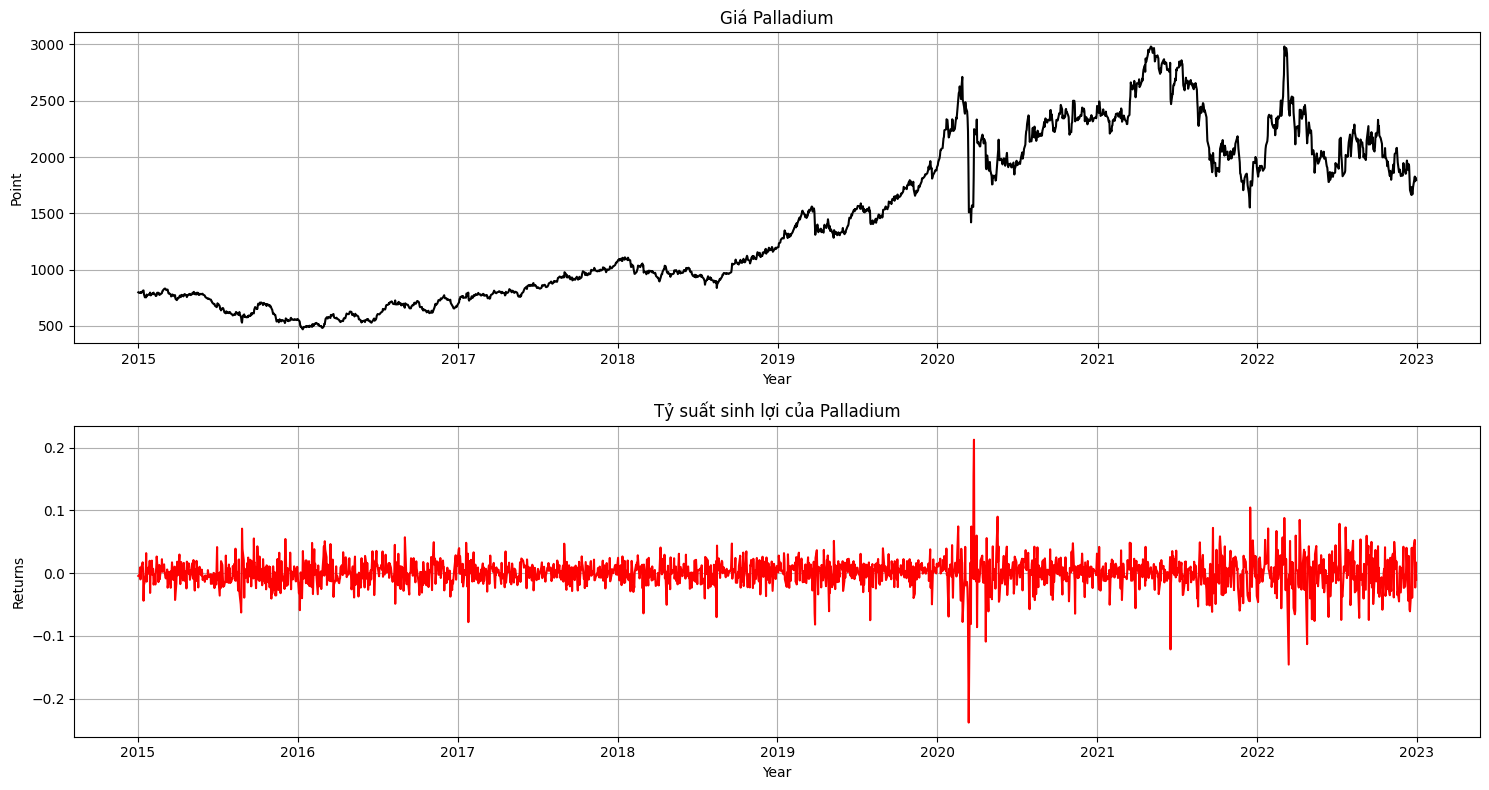

In [508]:
fig, ax= plt.subplots(2,1, figsize=(15,8))
ax[0].plot(df_pp, color='black')
ax[0].title.set_text('Giá Palladium')
ax[0].set(xlabel='Year', ylabel='Point')
ax[0].grid(True)
ax[1].plot(df_r_pp_temp, color='red')
ax[1].title.set_text('Tỷ suất sinh lợi của Palladium')
ax[1].set(xlabel='Year', ylabel='Returns')
ax[1].grid(True)
plt.tight_layout()

### 3. Description Statistic

In [509]:
print('Obs       :', len(r_pp))
print('Median    :', np.median(r_pp))
print('Mean      :', np.mean(r_pp))
print('Std. Dev  :', np.std(r_pp, ddof=1))
print('Minimum   :', np.min(r_pp))
print('Maximum   :', np.max(r_pp))
print('Skewness  :', stats.skew(r_pp))
print('Kurtosis  :', stats.kurtosis(r_pp, fisher = False))
print('Jarque-Bera test:', stats.jarque_bera(r_pp))

Obs       : 2023
Median    : 0.0012164116
Mean      : 0.00040129534
Std. Dev  : 0.023594638
Minimum   : -0.23815203
Maximum   : 0.21267653
Skewness  : -0.5082096075414623
Kurtosis  : 15.042680311629537
Jarque-Bera test: SignificanceResult(statistic=12311.57821380432, pvalue=0.0)


In [510]:
adf_pp = adfuller(r_pp)
print('ADF Statistic:', adf_pp[0])
print('p-value:', adf_pp[1])
print('Critical Values:', adf_pp[4])

ADF Statistic: -9.92245481571681
p-value: 2.966153081036182e-17
Critical Values: {'1%': -3.433627137787501, '5%': -2.8629876622368218, '10%': -2.5675406736265796}


### 4. ARCH(1)

In [511]:
#Chuyển TSSL sang dạng % cho thuận tiện
rp_pp = r_pp*100

In [512]:
#Ước lượng mô hình ARCH(1)
am0= arch_model(rp_pp, mean = 'Constant', p=1, o=0, q=0, dist='normal')
arch1 = am0.fit(update_freq=5, disp = "off")
print("ARCH(1) model:", "\n", arch1.summary(), "\n")
#Kiểm định phần dư của ARCH(1)
arch_stdresid= arch1.resid/arch1.conditional_volatility
arch1lb = acorr_ljungbox(arch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',arch1lb)
jb_arch = jarque_bera(arch_stdresid)
print('\nJB Test Result:','\n',jb_arch)


ARCH(1) model: 
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4464.91
Distribution:                  Normal   AIC:                           8935.81
Method:            Maximum Likelihood   BIC:                           8952.65
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:55   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0881  4.870e-02      1.810 

### 5. GARCH(1, 1)

In [513]:
#Ước lượng mô hình GARCH(1,1)
am1 = arch_model(rp_pp, mean = 'Constant', vol='GARCH', p=1, o=0, q=1, dist='normal')
garch1_1 = am1.fit(update_freq=5, disp = "off")
print("GARCH(1,1) model:", "\n", garch1_1.summary(), "\n")

#Kiểm định phần dư của GARCH(1,1)
garch_stdresid= garch1_1.resid/garch1_1.conditional_volatility
garch11lb = acorr_ljungbox(garch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',garch11lb)
jb_arch = jarque_bera(garch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

GARCH(1,1) model: 
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4364.87
Distribution:                  Normal   AIC:                           8737.75
Method:            Maximum Likelihood   BIC:                           8760.20
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:56   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0640  4.341e-02      1.4

### 6. GJR-GARCH

In [514]:
#Ước lượng mô hình TGARCH(1,1)
am2 = arch_model(rp_pp, mean = 'Constant', vol='GARCH', p=1, o=1, q=1, dist='Normal')
leverage_garch1_1 = am2.fit(update_freq=5, disp = "off")
print("TGARCH(1,1) model:", "\n", leverage_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
tgarch_stdresid= leverage_garch1_1.resid/leverage_garch1_1.conditional_volatility
tgarch11lb = acorr_ljungbox(tgarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',tgarch11lb)
jb_arch = jarque_bera(tgarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

TGARCH(1,1) model: 
                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4364.64
Distribution:                  Normal   AIC:                           8739.27
Method:            Maximum Likelihood   BIC:                           8767.33
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:56   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0570  4.351e-02      1.

### 7. EGRACH

In [515]:
#Ước lượng mô hình EGARCH(1,1)
am3 = arch_model(rp_pp, mean = 'Constant', vol='EGARCH', p=1, o=0, q=1, dist='Normal')
exponetial_garch1_1 = am3.fit(update_freq=5, disp = "off")
print("EGARCH(1,1) model:", "\n", exponetial_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
egarch_stdresid= exponetial_garch1_1.resid/exponetial_garch1_1.conditional_volatility
egarch11lb = acorr_ljungbox(egarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',egarch11lb)
jb_arch = jarque_bera(egarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

EGARCH(1,1) model: 
                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -4370.13
Distribution:                  Normal   AIC:                           8748.26
Method:            Maximum Likelihood   BIC:                           8770.71
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:56   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0564  4.514e-02      1.

### 8. Evaluate

In [516]:
#Tính các giá trị sai số của mô hình ARCH(1)
res= am0.fit(last_obs=1987, update_freq=5, disp='off')
forecasts = res.forecast(horizon=1)
forecast_vals = forecasts.residual_variance.values[-10:]
actual_vals = rp_pbk[-10:]

rmse_arch1 = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
mae_arch1 = mean_absolute_error(actual_vals, forecast_vals)
mape_arch1 = np.mean(np.abs(forecast_vals - actual_vals)/np.abs(actual_vals))

tic_arch1 = tic(forecast_vals, actual_vals) 

print('ARCH(1):')
print('RMSE: %0.3f' % rmse_arch1)
print('MAE: %0.3f' % mae_arch1) 
print('MAPE: %0.3f' % mape_arch1)
print('TIC: % 0.3f' % tic_arch1)

#Tính các giá trị sai số của mô hình GARCH(1,1)
res1= am1.fit(last_obs=1987, update_freq=5, disp='off')
forecasts1 = res1.forecast(horizon=1)
forecast_vals1 = forecasts1.residual_variance.values[-10:]

rmse_garch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals1))
mae_garch11 = mean_absolute_error(actual_vals, forecast_vals1)
mape_garch11 = np.mean(np.abs(forecast_vals1 - actual_vals)/np.abs(actual_vals))

tic_garch11 = tic(forecast_vals1, actual_vals) 

print('\nRMSE: %0.3f' % rmse_garch11)
print('MAE: %0.3f' % mae_garch11) 
print('MAPE: %0.3f' % mape_garch11)
print('TIC: % 0.3f' % tic_garch11)

#Tính các giá trị sai số của mô hình TGARCH(1,1)
res2= am2.fit(last_obs=1987, update_freq=5, disp='off')
forecasts2 = res2.forecast(horizon=1)
forecast_vals2 = forecasts2.residual_variance.values[-10:]

rmse_tgarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals2))
mae_tgarch11 = mean_absolute_error(actual_vals, forecast_vals2)
mape_tgarch11 = np.mean(np.abs(forecast_vals2 - actual_vals)/np.abs(actual_vals))

tic_tgarch11 = tic(forecast_vals2, actual_vals) 

print('\nRMSE: %0.3f' % rmse_tgarch11)
print('MAE: %0.3f' % mae_tgarch11) 
print('MAPE: %0.3f' % mape_tgarch11)
print('TIC: % 0.3f' % tic_tgarch11)

#Tính các giá trị sai số của mô hình EGARCH(1,1)
res3= am3.fit(last_obs=1987, update_freq=5, disp='off')
forecasts3 = res3.forecast(horizon=1)
forecast_vals3 = forecasts3.residual_variance.values[-10:]

rmse_egarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals3))
mae_egarch11 = mean_absolute_error(actual_vals, forecast_vals3)
mape_egarch11 = np.mean(np.abs(forecast_vals3 - actual_vals)/np.abs(actual_vals))

tic_egarch11 = tic(forecast_vals3, actual_vals) 

print('\nRMSE: %0.3f' % rmse_egarch11)
print('MAE: %0.3f' % mae_egarch11) 
print('MAPE: %0.3f' % mape_egarch11)
print('TIC: % 0.3f' % tic_egarch11)

RMSE_value=[rmse_arch1, rmse_garch11, rmse_tgarch11, rmse_egarch11]
best_RMSEprediction= np.argmin(RMSE_value)
print('\nBest Forecasting Model (Lowest RMSE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_RMSEprediction])

MAE_value=[mae_arch1, mae_arch1, mae_tgarch11, mae_egarch11]
best_MAEprediction= np.argmin(MAE_value)
print('\nBest Forecasting Model (Lowest MAE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAEprediction])

MAPE_value=[mape_arch1, mape_garch11, mape_tgarch11, mape_egarch11]
best_MAPEprediction= np.argmin(MAPE_value)
print('\nBest Forecasting Model (Lowest MAPE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAPEprediction])

TIC_value=[tic_arch1, tic_garch11, tic_tgarch11, tic_egarch11]
best_TICprediction= np.argmin(TIC_value)
print('\nBest Forecasting Model (Lowest TIC):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_TICprediction])

ARCH(1):
RMSE: 8.787
MAE: 7.231
MAPE: 85.710
TIC:  11.595

RMSE: 10.183
MAE: 9.837
MAPE: 113.987
TIC:  13.681

RMSE: 10.264
MAE: 9.908
MAPE: 114.757
TIC:  13.776

RMSE: 11.482
MAE: 11.205
MAPE: 128.844
TIC:  15.485

Best Forecasting Model (Lowest RMSE): ARCH(1)

Best Forecasting Model (Lowest MAE): ARCH(1)

Best Forecasting Model (Lowest MAPE): ARCH(1)

Best Forecasting Model (Lowest TIC): ARCH(1)


## PB

### 1. Data preparation

In [517]:
df_pb = PB_df.copy()
df_pb = df_pb.set_index('Date')
df_pb.index = pd.to_datetime(df_pb.index)
# df = df.to_numpy()
df_pb

,PB
Date,
2015-01-01,15.599
2015-01-02,15.768
2015-01-05,16.213
2015-01-06,16.637
2015-01-07,16.544
...,...
2022-12-23,23.920
2022-12-27,24.217
2022-12-28,23.840


In [518]:
df_data_pb = PB_df.copy()
df_data_pb = df_data_pb.to_numpy()
data_pb = df_data_pb[:, 1]
data_pb = np.float32(data_pb)
data_pb

array([15.599, 15.768, 16.213, ..., 23.84 , 24.25 , 24.04 ], dtype=float32)

In [519]:
r_pb = np.diff(np.log(data_pb), n=1, axis=0)
r_pb

array([ 0.01077557,  0.02783084,  0.02581573, ..., -0.01569009,
        0.01705194, -0.00869751], dtype=float32)

In [520]:
df_r_pb_temp = PB_df.copy()
df_r_pb_temp.drop(axis=0, index=[0], inplace=True)
df_r_pb_temp

,Date,PB
1,2015-01-02,15.768
2,2015-01-05,16.213
3,2015-01-06,16.637
4,2015-01-07,16.544
5,2015-01-08,16.385
...,...,...
2019,2022-12-23,23.920
2020,2022-12-27,24.217
2021,2022-12-28,23.840
2022,2022-12-29,24.250


In [521]:
df_r_pb_temp['Return'] = r_pb
df_r_pb_temp.drop(axis=1, columns='PB', inplace=True)
df_r_pb_temp = df_r_pb_temp.set_index('Date')
df_r_pb_temp.index = pd.to_datetime(df_r_pb_temp.index)
df_r_pb_temp

,Return
Date,
2015-01-02,0.010776
2015-01-05,0.027831
2015-01-06,0.025816
2015-01-07,-0.005605
2015-01-08,-0.009657
...,...
2022-12-23,0.012536
2022-12-27,0.012340
2022-12-28,-0.015690


### 2. Visualize

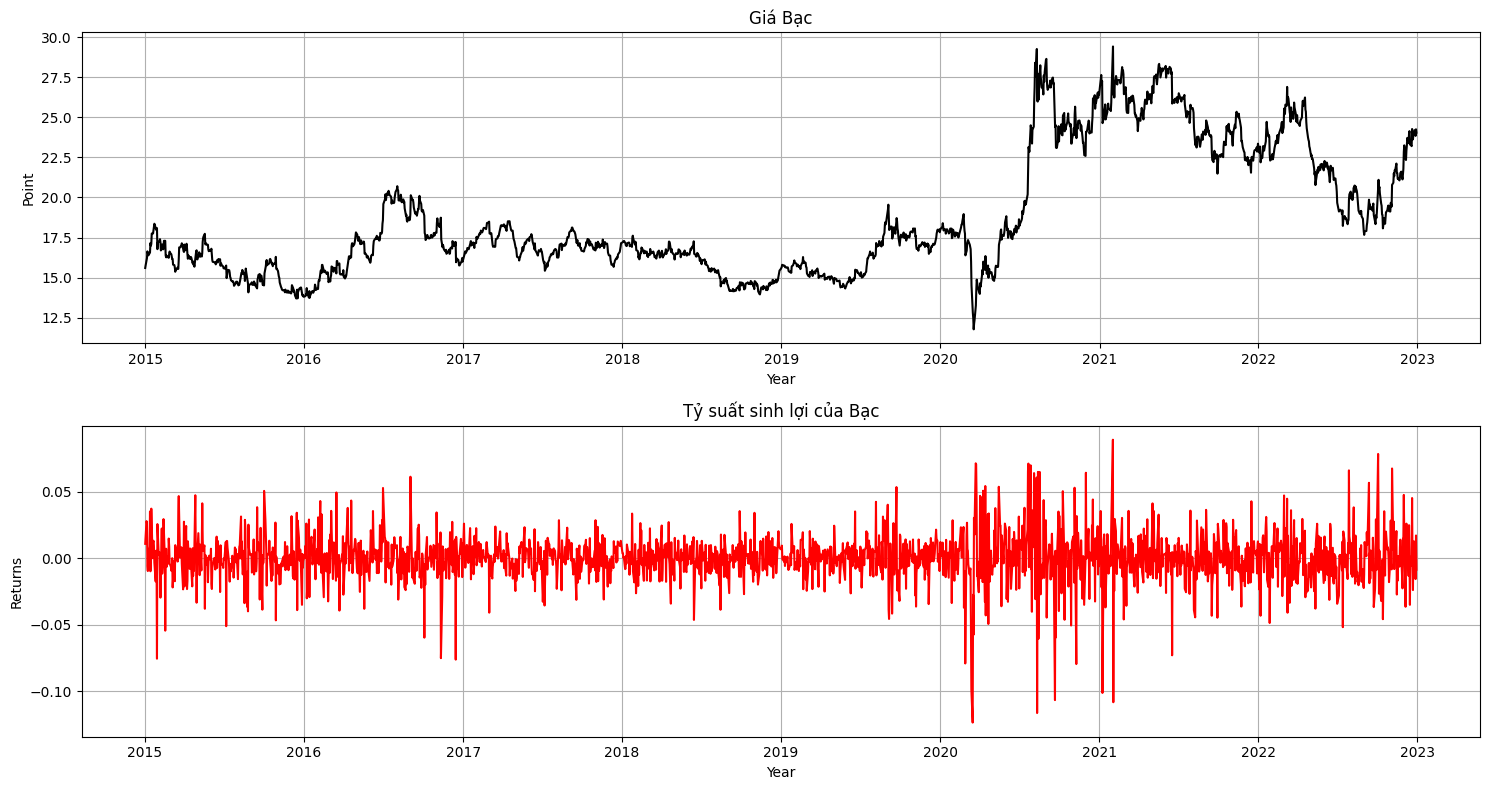

In [522]:
fig, ax= plt.subplots(2,1, figsize=(15,8))
ax[0].plot(df_pb, color='black')
ax[0].title.set_text('Giá Bạc')
ax[0].set(xlabel='Year', ylabel='Point')
ax[0].grid(True)
ax[1].plot(df_r_pb_temp, color='red')
ax[1].title.set_text('Tỷ suất sinh lợi của Bạc')
ax[1].set(xlabel='Year', ylabel='Returns')
ax[1].grid(True)
plt.tight_layout()

### 3. Description Statistic

In [523]:
print('Obs       :', len(r_pb))
print('Median    :', np.median(r_pb))
print('Mean      :', np.mean(r_pb))
print('Std. Dev  :', np.std(r_pb, ddof=1))
print('Minimum   :', np.min(r_pb))
print('Maximum   :', np.max(r_pb))
print('Skewness  :', stats.skew(r_pb))
print('Kurtosis  :', stats.kurtosis(r_pb, fisher = False))
print('Jarque-Bera test:', stats.jarque_bera(r_pb))

Obs       : 2023
Median    : 0.00027871132
Mean      : 0.00021379747
Std. Dev  : 0.01811993
Minimum   : -0.123454094
Maximum   : 0.08896017
Skewness  : -0.5015420676842576
Kurtosis  : 9.115571510613309
Jarque-Bera test: SignificanceResult(statistic=3237.338849993314, pvalue=0.0)


In [524]:
adf_pb= adfuller(r_pb)
print('ADF Statistic:', adf_pb[0])
print('p-value:', adf_pb[1])
print('Critical Values:', adf_pb[4])

ADF Statistic: -19.58906374072542
p-value: 0.0
Critical Values: {'1%': -3.43359622795523, '5%': -2.862974015368934, '10%': -2.5675334073685523}


### 4. ARCH(1)

In [525]:
#Chuyển TSSL sang dạng % cho thuận tiện
rp_pb = r_pb*100

In [526]:
#Ước lượng mô hình ARCH(1)
am0= arch_model(rp_pb, mean = 'Constant', p=1, o=0, q=0, dist='normal')
arch1 = am0.fit(update_freq=5, disp = "off")
print("ARCH(1) model:", "\n", arch1.summary(), "\n")
#Kiểm định phần dư của ARCH(1)
arch_stdresid= arch1.resid/arch1.conditional_volatility
arch1lb = acorr_ljungbox(arch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',arch1lb)
jb_arch = jarque_bera(arch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

ARCH(1) model: 
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3998.26
Distribution:                  Normal   AIC:                           8002.52
Method:            Maximum Likelihood   BIC:                           8019.36
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:57   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.9657e-03  3.900e-02  

### 5. GARCH(1, 1)

In [527]:
#Ước lượng mô hình GARCH(1,1)
am1 = arch_model(rp_pb, mean = 'Constant', vol='GARCH', p=1, o=0, q=1, dist='normal')
garch1_1 = am1.fit(update_freq=5, disp = "off")
print("GARCH(1,1) model:", "\n", garch1_1.summary(), "\n")

#Kiểm định phần dư của GARCH(1,1)
garch_stdresid= garch1_1.resid/garch1_1.conditional_volatility
garch11lb = acorr_ljungbox(garch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',garch11lb)
jb_arch = jarque_bera(garch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

GARCH(1,1) model: 
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3892.15
Distribution:                  Normal   AIC:                           7792.29
Method:            Maximum Likelihood   BIC:                           7814.74
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:57   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.8463e-03  3.417e-0

### 6. GJR-GARCH

In [528]:
#Ước lượng mô hình TGARCH(1,1)
am2 = arch_model(rp_pb, mean = 'Constant', vol='GARCH', p=1, o=1, q=1, dist='Normal')
leverage_garch1_1 = am2.fit(update_freq=5, disp = "off")
print("TGARCH(1,1) model:", "\n", leverage_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
tgarch_stdresid= leverage_garch1_1.resid/leverage_garch1_1.conditional_volatility
tgarch11lb = acorr_ljungbox(tgarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',tgarch11lb)
jb_arch = jarque_bera(tgarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

TGARCH(1,1) model: 
                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3889.96
Distribution:                  Normal   AIC:                           7789.92
Method:            Maximum Likelihood   BIC:                           7817.98
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.6287e-03  3.464e-02  

### 7. EGARCH

In [529]:
#Ước lượng mô hình EGARCH(1,1)
am3 = arch_model(rp_pb, mean = 'Constant', vol='EGARCH', p=1, o=0, q=1, dist='Normal')
exponetial_garch1_1 = am3.fit(update_freq=5, disp = "off")
print("EGARCH(1,1) model:", "\n", exponetial_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
egarch_stdresid= exponetial_garch1_1.resid/exponetial_garch1_1.conditional_volatility
egarch11lb = acorr_ljungbox(egarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',egarch11lb)
jb_arch = jarque_bera(egarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

EGARCH(1,1) model: 
                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3890.95
Distribution:                  Normal   AIC:                           7789.91
Method:            Maximum Likelihood   BIC:                           7812.36
                                        No. Observations:                 2023
Date:                Fri, Jun 14 2024   Df Residuals:                     2022
Time:                        00:19:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0168  3.472e-02  

### 8. Evaluate

In [530]:
#Tính các giá trị sai số của mô hình ARCH(1)
res= am0.fit(last_obs=1987, update_freq=5, disp='off')
forecasts = res.forecast(horizon=1)
forecast_vals = forecasts.residual_variance.values[-10:]
actual_vals = rp_pbk[-10:]

rmse_arch1 = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
mae_arch1 = mean_absolute_error(actual_vals, forecast_vals)
mape_arch1 = np.mean(np.abs(forecast_vals - actual_vals)/np.abs(actual_vals))

tic_arch1 = tic(forecast_vals, actual_vals) 

print('ARCH(1):')
print('RMSE: %0.3f' % rmse_arch1)
print('MAE: %0.3f' % mae_arch1) 
print('MAPE: %0.3f' % mape_arch1)
print('TIC: % 0.3f' % tic_arch1)

#Tính các giá trị sai số của mô hình GARCH(1,1)
res1= am1.fit(last_obs=1987, update_freq=5, disp='off')
forecasts1 = res1.forecast(horizon=1)
forecast_vals1 = forecasts1.residual_variance.values[-10:]

rmse_garch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals1))
mae_garch11 = mean_absolute_error(actual_vals, forecast_vals1)
mape_garch11 = np.mean(np.abs(forecast_vals1 - actual_vals)/np.abs(actual_vals))

tic_garch11 = tic(forecast_vals1, actual_vals) 

print('\nRMSE: %0.3f' % rmse_garch11)
print('MAE: %0.3f' % mae_garch11) 
print('MAPE: %0.3f' % mape_garch11)
print('TIC: % 0.3f' % tic_garch11)

#Tính các giá trị sai số của mô hình TGARCH(1,1)
res2= am2.fit(last_obs=1987, update_freq=5, disp='off')
forecasts2 = res2.forecast(horizon=1)
forecast_vals2 = forecasts2.residual_variance.values[-10:]

rmse_tgarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals2))
mae_tgarch11 = mean_absolute_error(actual_vals, forecast_vals2)
mape_tgarch11 = np.mean(np.abs(forecast_vals2 - actual_vals)/np.abs(actual_vals))

tic_tgarch11 = tic(forecast_vals2, actual_vals) 

print('\nRMSE: %0.3f' % rmse_tgarch11)
print('MAE: %0.3f' % mae_tgarch11) 
print('MAPE: %0.3f' % mape_tgarch11)
print('TIC: % 0.3f' % tic_tgarch11)

#Tính các giá trị sai số của mô hình EGARCH(1,1)
res3= am3.fit(last_obs=1987, update_freq=5, disp='off')
forecasts3 = res3.forecast(horizon=1)
forecast_vals3 = forecasts3.residual_variance.values[-10:]

rmse_egarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals3))
mae_egarch11 = mean_absolute_error(actual_vals, forecast_vals3)
mape_egarch11 = np.mean(np.abs(forecast_vals3 - actual_vals)/np.abs(actual_vals))

tic_egarch11 = tic(forecast_vals3, actual_vals) 

print('\nRMSE: %0.3f' % rmse_egarch11)
print('MAE: %0.3f' % mae_egarch11) 
print('MAPE: %0.3f' % mape_egarch11)
print('TIC: % 0.3f' % tic_egarch11)

RMSE_value=[rmse_arch1, rmse_garch11, rmse_tgarch11, rmse_egarch11]
best_RMSEprediction= np.argmin(RMSE_value)
print('\nBest Forecasting Model (Lowest RMSE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_RMSEprediction])

MAE_value=[mae_arch1, mae_arch1, mae_tgarch11, mae_egarch11]
best_MAEprediction= np.argmin(MAE_value)
print('\nBest Forecasting Model (Lowest MAE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAEprediction])

MAPE_value=[mape_arch1, mape_garch11, mape_tgarch11, mape_egarch11]
best_MAPEprediction= np.argmin(MAPE_value)
print('\nBest Forecasting Model (Lowest MAPE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAPEprediction])

TIC_value=[tic_arch1, tic_garch11, tic_tgarch11, tic_egarch11]
best_TICprediction= np.argmin(TIC_value)
print('\nBest Forecasting Model (Lowest TIC):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_TICprediction])

ARCH(1):
RMSE: 3.432
MAE: 3.109
MAPE: 35.876
TIC:  5.019

RMSE: 4.638
MAE: 4.003
MAPE: 50.670
TIC:  6.268

RMSE: 5.002
MAE: 4.425
MAPE: 55.247
TIC:  6.769

RMSE: 5.222
MAE: 4.684
MAPE: 58.062
TIC:  7.076

Best Forecasting Model (Lowest RMSE): ARCH(1)

Best Forecasting Model (Lowest MAE): ARCH(1)

Best Forecasting Model (Lowest MAPE): ARCH(1)

Best Forecasting Model (Lowest TIC): ARCH(1)
